In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
wine = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
x = wine.drop(['quality'], axis  = 1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [24]:
y = wine["quality"]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Maximum accuracy:- 0.6 at K = 16
Minumun accuracy:- 0.528125 at K = 1


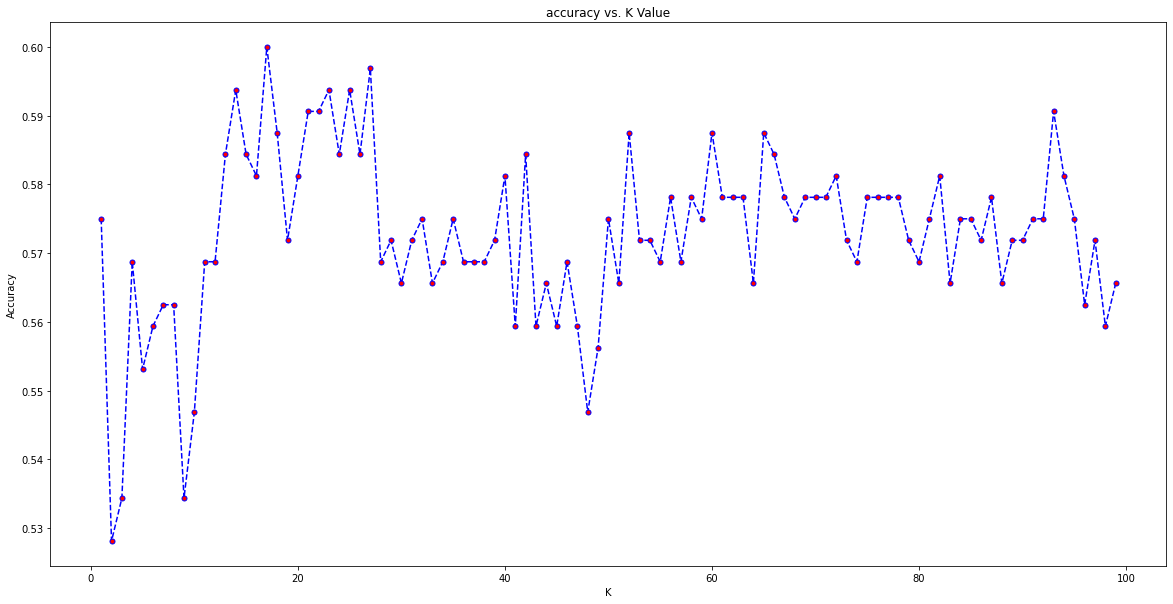

In [42]:
from sklearn.neighbors import KNeighborsClassifier

acc = []

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(20,10))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
print("Minumun accuracy:-",min(acc),"at K =",acc.index(min(acc)))

In [43]:
k = 16

knn = KNeighborsClassifier (n_neighbors=k)

knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=16)

In [45]:
y_pred = knn.predict (x_test)
y_pred

array([7, 5, 6, 5, 7, 7, 7, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 7,
       6, 6, 6, 5, 6, 5, 6, 7, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 5, 7, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 6, 6,
       6, 5, 5, 6, 6, 7, 7, 5, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6,
       7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 6, 6, 6, 7,
       5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6,
       5, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6,
       5, 5, 6, 6, 5, 5, 5, 7, 7, 5, 5, 5, 6, 5, 5, 6, 7, 6, 5, 6, 5, 6,
       6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 7, 5, 7, 6, 6, 5, 7,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 7,
       5, 7, 5, 7, 5, 5, 5, 7, 6, 6, 6, 6, 5, 5, 6,

In [46]:
from sklearn import metrics

print("Nilai K yang digunakan adalah :",k)
print("Accuracy at K =",k,"adalah",metrics.accuracy_score(y_test, y_pred))

Nilai K yang digunakan adalah : 16
Accuracy at K = 16 adalah 0.58125


In [47]:
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
print(confusion_matrix(y_test, y_pred))

[[ 0  0  3  0  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0 96 33  1  0]
 [ 0  0 48 74 12  0]
 [ 0  0  2 18 16  0]
 [ 0  0  0  3  2  0]]


In [49]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.60      0.74      0.66       130
           6       0.57      0.55      0.56       134
           7       0.52      0.44      0.48        36
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.28      0.29      0.28       320
weighted avg       0.54      0.58      0.56       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
